# #readMoreCanlit | A Recommender System for Canadian Literature

<center><img src='../img/readMoreCanlit.png'></center>

> Shawn Syms<br>
> https://shawnsyms.github.io/ <br>
> shawn@shawnsyms.com <br>
> 416-843-4169 <br>

## About my project

#readMoreCanlit will be a content-based recommender system that promotes the reading of Canadian literature. 

According to a recent survey by the non-profit organization BookNetCanada, 92% percent of Canadians had read a paper copy of a book, and use of e-reading devices had increased by 25% over the previous year. Still, the Canadian best-seller lists tend to be dominated by American and international titles. 

#readMoreCanlit could serve as part of a consolidated marketing program to promote reading Canadian literature. Future phases could include a purchasing engine.  

## Problem statement

I will build a content-based recommender system that accepts input from readers about content they like or dislike, and makes appropriate recommendations from a curated list of Canadian books: 

* The user should also be able to provide the name of a non-Canadian title they prefer (or dislike) 
* Or they can select one from a list of 5-10 titles that the system already knows about
* The user should also be able to input a freeform sentence about the type of book that they like.

The baseline for comparison could be whether or not the system can make recommendations that are better than random guessing, which can be assessed through domain knowledge as well as whether the recommendations are in the same genre. 

Initial testing suggests that the model actually makes very good recommendations.

## Methods and models

> * This project will use regex and NLTK's Porter Stemmer for text preprocessing
> * The application will be coded using Python, flask, pandas and scikit learn
> * Because this project involved many, many pieces of text that need to be compared to one another, the text will be transformed and catalogued by the TF-IDF (term frequency–inverse document frequency) Vectorizer
> * Additional tools and technologies may be implemented as research and development continue

## Risks and assumptions

#### Risks
> * the dataset still requires descriptions and excerpts for some titles; I'm working to automate this
> * the coding for this project is beyond the scope of work that I have completed to date
> * the initial proof-of-concept dataset is small (275-400 observations)
> * I have not seen anyone else doing exactly what I'm trying to do, meaning there will be less examples to draw from for certain aspects of the project

#### Assumptions
> * I will have ongoing access to the BookNetCanada API to expand the production dataset

## Data source

For the initial prototype of #readMoreCanlit, the dataset consists of 100 works of Canadian fiction and 100 works of international fiction, categorized by author, title, genre and year published, along with a description and an excerpt long enough to provide useful input to a machine-learning model, but short enough not to intentionally infringe copyright. The database has this structure in order to both (1) allow for content-based recommendations based on similar metadata as well as (2) recommendations based on comparing the content and descriptions using machine learning. I built the database myself using domain knowledge.

### Imports

In [126]:
# pandas and numpy
import pandas as pd
import numpy as np

# nltk imports
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

# sci-kit learn imports
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.pipeline import Pipeline, make_pipeline

# Presentation and visuals
import seaborn as sns
import matplotlib.pyplot as plt

# This magic line will allow you to generate plots
# within the Jupyter notebook.
%matplotlib inline
from pprint import pprint
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000
# pd.set_option(display.max_columns), None

# other imports
import json
import lxml
import random
import regex as re
import time
import urllib.request
from datetime import datetime

# Data acquisition

In [110]:
isbn = pd.read_csv('../data/isbn.csv')
isbn = isbn.applymap(str)
isbn.dtypes

isbn        object
title       object
authors     object
overview    object
dtype: object

In [111]:
isbn = isbn[0:4499]
isbn

,isbn,title,authors,overview
0,9781484722886,nan,nan,nan
1,9780425174401,nan,nan,nan
2,9780471246909,nan,nan,nan
3,9780471390206,nan,nan,nan
4,9781415900376,nan,nan,nan
...,...,...,...,...
4494,9780812995251,nan,nan,nan
4495,9780545470063,nan,nan,nan
4496,9780307492180,nan,nan,nan
4497,9781606998045,nan,nan,nan


In [113]:
isbn.tail()

,isbn,title,authors,overview
4494,9780812995251,nan,nan,nan
4495,9780545470063,nan,nan,nan
4496,9780307492180,nan,nan,nan
4497,9781606998045,nan,nan,nan
4498,9780373718948,nan,nan,nan


In [114]:
for j in range(len(isbn)):

    header = {'Authorization': '44023_23ab132f3977ad9849e8f1a5d7dc73bf'}
    base_url = ('https://api2.isbndb.com/book/')
    response = requests.get(base_url + isbn['isbn'][j], headers=header)
    payload = response.json()
      
    try:
        isbn['title'][j] = payload['book']['title']
    
    except:
        isbn['title'][j] = np.nan
    
    try:
        isbn['authors'][j] = payload['book']['authors']
    
    except:
        isbn['authors'][j] = np.nan
              
    try:
        isbn['overview'][j] = payload['book']['overview']
    
    except:
        isbn['overview'][j] = np.nan
  
    print('Info downloaded for book ' + str(j + 1) + ' of ' +  str(len(isbn)) + ' books.')
              
    time.sleep(1)
    

Info downloaded for book 1 of 4499 books.
Info downloaded for book 2 of 4499 books.
Info downloaded for book 3 of 4499 books.
Info downloaded for book 4 of 4499 books.
Info downloaded for book 5 of 4499 books.
Info downloaded for book 6 of 4499 books.
Info downloaded for book 7 of 4499 books.
Info downloaded for book 8 of 4499 books.
Info downloaded for book 9 of 4499 books.
Info downloaded for book 10 of 4499 books.
Info downloaded for book 11 of 4499 books.
Info downloaded for book 12 of 4499 books.
Info downloaded for book 13 of 4499 books.
Info downloaded for book 14 of 4499 books.
Info downloaded for book 15 of 4499 books.
Info downloaded for book 16 of 4499 books.
Info downloaded for book 17 of 4499 books.
Info downloaded for book 18 of 4499 books.
Info downloaded for book 19 of 4499 books.
Info downloaded for book 20 of 4499 books.
Info downloaded for book 21 of 4499 books.
Info downloaded for book 22 of 4499 books.
Info downloaded for book 23 of 4499 books.
Info downloaded for 

Info downloaded for book 190 of 4499 books.
Info downloaded for book 191 of 4499 books.
Info downloaded for book 192 of 4499 books.
Info downloaded for book 193 of 4499 books.
Info downloaded for book 194 of 4499 books.
Info downloaded for book 195 of 4499 books.
Info downloaded for book 196 of 4499 books.
Info downloaded for book 197 of 4499 books.
Info downloaded for book 198 of 4499 books.
Info downloaded for book 199 of 4499 books.
Info downloaded for book 200 of 4499 books.
Info downloaded for book 201 of 4499 books.
Info downloaded for book 202 of 4499 books.
Info downloaded for book 203 of 4499 books.
Info downloaded for book 204 of 4499 books.
Info downloaded for book 205 of 4499 books.
Info downloaded for book 206 of 4499 books.
Info downloaded for book 207 of 4499 books.
Info downloaded for book 208 of 4499 books.
Info downloaded for book 209 of 4499 books.
Info downloaded for book 210 of 4499 books.
Info downloaded for book 211 of 4499 books.
Info downloaded for book 212 of 

Info downloaded for book 377 of 4499 books.
Info downloaded for book 378 of 4499 books.
Info downloaded for book 379 of 4499 books.
Info downloaded for book 380 of 4499 books.
Info downloaded for book 381 of 4499 books.
Info downloaded for book 382 of 4499 books.
Info downloaded for book 383 of 4499 books.
Info downloaded for book 384 of 4499 books.
Info downloaded for book 385 of 4499 books.
Info downloaded for book 386 of 4499 books.
Info downloaded for book 387 of 4499 books.
Info downloaded for book 388 of 4499 books.
Info downloaded for book 389 of 4499 books.
Info downloaded for book 390 of 4499 books.
Info downloaded for book 391 of 4499 books.
Info downloaded for book 392 of 4499 books.
Info downloaded for book 393 of 4499 books.
Info downloaded for book 394 of 4499 books.
Info downloaded for book 395 of 4499 books.
Info downloaded for book 396 of 4499 books.
Info downloaded for book 397 of 4499 books.
Info downloaded for book 398 of 4499 books.
Info downloaded for book 399 of 

Info downloaded for book 564 of 4499 books.
Info downloaded for book 565 of 4499 books.
Info downloaded for book 566 of 4499 books.
Info downloaded for book 567 of 4499 books.
Info downloaded for book 568 of 4499 books.
Info downloaded for book 569 of 4499 books.
Info downloaded for book 570 of 4499 books.
Info downloaded for book 571 of 4499 books.
Info downloaded for book 572 of 4499 books.
Info downloaded for book 573 of 4499 books.
Info downloaded for book 574 of 4499 books.
Info downloaded for book 575 of 4499 books.
Info downloaded for book 576 of 4499 books.
Info downloaded for book 577 of 4499 books.
Info downloaded for book 578 of 4499 books.
Info downloaded for book 579 of 4499 books.
Info downloaded for book 580 of 4499 books.
Info downloaded for book 581 of 4499 books.
Info downloaded for book 582 of 4499 books.
Info downloaded for book 583 of 4499 books.
Info downloaded for book 584 of 4499 books.
Info downloaded for book 585 of 4499 books.
Info downloaded for book 586 of 

Info downloaded for book 751 of 4499 books.
Info downloaded for book 752 of 4499 books.
Info downloaded for book 753 of 4499 books.
Info downloaded for book 754 of 4499 books.
Info downloaded for book 755 of 4499 books.
Info downloaded for book 756 of 4499 books.
Info downloaded for book 757 of 4499 books.
Info downloaded for book 758 of 4499 books.
Info downloaded for book 759 of 4499 books.
Info downloaded for book 760 of 4499 books.
Info downloaded for book 761 of 4499 books.
Info downloaded for book 762 of 4499 books.
Info downloaded for book 763 of 4499 books.
Info downloaded for book 764 of 4499 books.
Info downloaded for book 765 of 4499 books.
Info downloaded for book 766 of 4499 books.
Info downloaded for book 767 of 4499 books.
Info downloaded for book 768 of 4499 books.
Info downloaded for book 769 of 4499 books.
Info downloaded for book 770 of 4499 books.
Info downloaded for book 771 of 4499 books.
Info downloaded for book 772 of 4499 books.
Info downloaded for book 773 of 

Info downloaded for book 938 of 4499 books.
Info downloaded for book 939 of 4499 books.
Info downloaded for book 940 of 4499 books.
Info downloaded for book 941 of 4499 books.
Info downloaded for book 942 of 4499 books.
Info downloaded for book 943 of 4499 books.
Info downloaded for book 944 of 4499 books.
Info downloaded for book 945 of 4499 books.
Info downloaded for book 946 of 4499 books.
Info downloaded for book 947 of 4499 books.
Info downloaded for book 948 of 4499 books.
Info downloaded for book 949 of 4499 books.
Info downloaded for book 950 of 4499 books.
Info downloaded for book 951 of 4499 books.
Info downloaded for book 952 of 4499 books.
Info downloaded for book 953 of 4499 books.
Info downloaded for book 954 of 4499 books.
Info downloaded for book 955 of 4499 books.
Info downloaded for book 956 of 4499 books.
Info downloaded for book 957 of 4499 books.
Info downloaded for book 958 of 4499 books.
Info downloaded for book 959 of 4499 books.
Info downloaded for book 960 of 

Info downloaded for book 1122 of 4499 books.
Info downloaded for book 1123 of 4499 books.
Info downloaded for book 1124 of 4499 books.
Info downloaded for book 1125 of 4499 books.
Info downloaded for book 1126 of 4499 books.
Info downloaded for book 1127 of 4499 books.
Info downloaded for book 1128 of 4499 books.
Info downloaded for book 1129 of 4499 books.
Info downloaded for book 1130 of 4499 books.
Info downloaded for book 1131 of 4499 books.
Info downloaded for book 1132 of 4499 books.
Info downloaded for book 1133 of 4499 books.
Info downloaded for book 1134 of 4499 books.
Info downloaded for book 1135 of 4499 books.
Info downloaded for book 1136 of 4499 books.
Info downloaded for book 1137 of 4499 books.
Info downloaded for book 1138 of 4499 books.
Info downloaded for book 1139 of 4499 books.
Info downloaded for book 1140 of 4499 books.
Info downloaded for book 1141 of 4499 books.
Info downloaded for book 1142 of 4499 books.
Info downloaded for book 1143 of 4499 books.
Info downl

Info downloaded for book 1305 of 4499 books.
Info downloaded for book 1306 of 4499 books.
Info downloaded for book 1307 of 4499 books.
Info downloaded for book 1308 of 4499 books.
Info downloaded for book 1309 of 4499 books.
Info downloaded for book 1310 of 4499 books.
Info downloaded for book 1311 of 4499 books.
Info downloaded for book 1312 of 4499 books.
Info downloaded for book 1313 of 4499 books.
Info downloaded for book 1314 of 4499 books.
Info downloaded for book 1315 of 4499 books.
Info downloaded for book 1316 of 4499 books.
Info downloaded for book 1317 of 4499 books.
Info downloaded for book 1318 of 4499 books.
Info downloaded for book 1319 of 4499 books.
Info downloaded for book 1320 of 4499 books.
Info downloaded for book 1321 of 4499 books.
Info downloaded for book 1322 of 4499 books.
Info downloaded for book 1323 of 4499 books.
Info downloaded for book 1324 of 4499 books.
Info downloaded for book 1325 of 4499 books.
Info downloaded for book 1326 of 4499 books.
Info downl

Info downloaded for book 1488 of 4499 books.
Info downloaded for book 1489 of 4499 books.
Info downloaded for book 1490 of 4499 books.
Info downloaded for book 1491 of 4499 books.
Info downloaded for book 1492 of 4499 books.
Info downloaded for book 1493 of 4499 books.
Info downloaded for book 1494 of 4499 books.
Info downloaded for book 1495 of 4499 books.
Info downloaded for book 1496 of 4499 books.
Info downloaded for book 1497 of 4499 books.
Info downloaded for book 1498 of 4499 books.
Info downloaded for book 1499 of 4499 books.
Info downloaded for book 1500 of 4499 books.
Info downloaded for book 1501 of 4499 books.
Info downloaded for book 1502 of 4499 books.
Info downloaded for book 1503 of 4499 books.
Info downloaded for book 1504 of 4499 books.
Info downloaded for book 1505 of 4499 books.
Info downloaded for book 1506 of 4499 books.
Info downloaded for book 1507 of 4499 books.
Info downloaded for book 1508 of 4499 books.
Info downloaded for book 1509 of 4499 books.
Info downl

Info downloaded for book 1671 of 4499 books.
Info downloaded for book 1672 of 4499 books.
Info downloaded for book 1673 of 4499 books.
Info downloaded for book 1674 of 4499 books.
Info downloaded for book 1675 of 4499 books.
Info downloaded for book 1676 of 4499 books.
Info downloaded for book 1677 of 4499 books.
Info downloaded for book 1678 of 4499 books.
Info downloaded for book 1679 of 4499 books.
Info downloaded for book 1680 of 4499 books.
Info downloaded for book 1681 of 4499 books.
Info downloaded for book 1682 of 4499 books.
Info downloaded for book 1683 of 4499 books.
Info downloaded for book 1684 of 4499 books.
Info downloaded for book 1685 of 4499 books.
Info downloaded for book 1686 of 4499 books.
Info downloaded for book 1687 of 4499 books.
Info downloaded for book 1688 of 4499 books.
Info downloaded for book 1689 of 4499 books.
Info downloaded for book 1690 of 4499 books.
Info downloaded for book 1691 of 4499 books.
Info downloaded for book 1692 of 4499 books.
Info downl

Info downloaded for book 1854 of 4499 books.
Info downloaded for book 1855 of 4499 books.
Info downloaded for book 1856 of 4499 books.
Info downloaded for book 1857 of 4499 books.
Info downloaded for book 1858 of 4499 books.
Info downloaded for book 1859 of 4499 books.
Info downloaded for book 1860 of 4499 books.
Info downloaded for book 1861 of 4499 books.
Info downloaded for book 1862 of 4499 books.
Info downloaded for book 1863 of 4499 books.
Info downloaded for book 1864 of 4499 books.
Info downloaded for book 1865 of 4499 books.
Info downloaded for book 1866 of 4499 books.
Info downloaded for book 1867 of 4499 books.
Info downloaded for book 1868 of 4499 books.
Info downloaded for book 1869 of 4499 books.
Info downloaded for book 1870 of 4499 books.
Info downloaded for book 1871 of 4499 books.
Info downloaded for book 1872 of 4499 books.
Info downloaded for book 1873 of 4499 books.
Info downloaded for book 1874 of 4499 books.
Info downloaded for book 1875 of 4499 books.
Info downl

Info downloaded for book 2037 of 4499 books.
Info downloaded for book 2038 of 4499 books.
Info downloaded for book 2039 of 4499 books.
Info downloaded for book 2040 of 4499 books.
Info downloaded for book 2041 of 4499 books.
Info downloaded for book 2042 of 4499 books.
Info downloaded for book 2043 of 4499 books.
Info downloaded for book 2044 of 4499 books.
Info downloaded for book 2045 of 4499 books.
Info downloaded for book 2046 of 4499 books.
Info downloaded for book 2047 of 4499 books.
Info downloaded for book 2048 of 4499 books.
Info downloaded for book 2049 of 4499 books.
Info downloaded for book 2050 of 4499 books.
Info downloaded for book 2051 of 4499 books.
Info downloaded for book 2052 of 4499 books.
Info downloaded for book 2053 of 4499 books.
Info downloaded for book 2054 of 4499 books.
Info downloaded for book 2055 of 4499 books.
Info downloaded for book 2056 of 4499 books.
Info downloaded for book 2057 of 4499 books.
Info downloaded for book 2058 of 4499 books.
Info downl

Info downloaded for book 2220 of 4499 books.
Info downloaded for book 2221 of 4499 books.
Info downloaded for book 2222 of 4499 books.
Info downloaded for book 2223 of 4499 books.
Info downloaded for book 2224 of 4499 books.
Info downloaded for book 2225 of 4499 books.
Info downloaded for book 2226 of 4499 books.
Info downloaded for book 2227 of 4499 books.
Info downloaded for book 2228 of 4499 books.
Info downloaded for book 2229 of 4499 books.
Info downloaded for book 2230 of 4499 books.
Info downloaded for book 2231 of 4499 books.
Info downloaded for book 2232 of 4499 books.
Info downloaded for book 2233 of 4499 books.
Info downloaded for book 2234 of 4499 books.
Info downloaded for book 2235 of 4499 books.
Info downloaded for book 2236 of 4499 books.
Info downloaded for book 2237 of 4499 books.
Info downloaded for book 2238 of 4499 books.
Info downloaded for book 2239 of 4499 books.
Info downloaded for book 2240 of 4499 books.
Info downloaded for book 2241 of 4499 books.
Info downl

Info downloaded for book 2403 of 4499 books.
Info downloaded for book 2404 of 4499 books.
Info downloaded for book 2405 of 4499 books.
Info downloaded for book 2406 of 4499 books.
Info downloaded for book 2407 of 4499 books.
Info downloaded for book 2408 of 4499 books.
Info downloaded for book 2409 of 4499 books.
Info downloaded for book 2410 of 4499 books.
Info downloaded for book 2411 of 4499 books.
Info downloaded for book 2412 of 4499 books.
Info downloaded for book 2413 of 4499 books.
Info downloaded for book 2414 of 4499 books.
Info downloaded for book 2415 of 4499 books.
Info downloaded for book 2416 of 4499 books.
Info downloaded for book 2417 of 4499 books.
Info downloaded for book 2418 of 4499 books.
Info downloaded for book 2419 of 4499 books.
Info downloaded for book 2420 of 4499 books.
Info downloaded for book 2421 of 4499 books.
Info downloaded for book 2422 of 4499 books.
Info downloaded for book 2423 of 4499 books.
Info downloaded for book 2424 of 4499 books.
Info downl

Info downloaded for book 2586 of 4499 books.
Info downloaded for book 2587 of 4499 books.
Info downloaded for book 2588 of 4499 books.
Info downloaded for book 2589 of 4499 books.
Info downloaded for book 2590 of 4499 books.
Info downloaded for book 2591 of 4499 books.
Info downloaded for book 2592 of 4499 books.
Info downloaded for book 2593 of 4499 books.
Info downloaded for book 2594 of 4499 books.
Info downloaded for book 2595 of 4499 books.
Info downloaded for book 2596 of 4499 books.
Info downloaded for book 2597 of 4499 books.
Info downloaded for book 2598 of 4499 books.
Info downloaded for book 2599 of 4499 books.
Info downloaded for book 2600 of 4499 books.
Info downloaded for book 2601 of 4499 books.
Info downloaded for book 2602 of 4499 books.
Info downloaded for book 2603 of 4499 books.
Info downloaded for book 2604 of 4499 books.
Info downloaded for book 2605 of 4499 books.
Info downloaded for book 2606 of 4499 books.
Info downloaded for book 2607 of 4499 books.
Info downl

Info downloaded for book 2769 of 4499 books.
Info downloaded for book 2770 of 4499 books.
Info downloaded for book 2771 of 4499 books.
Info downloaded for book 2772 of 4499 books.
Info downloaded for book 2773 of 4499 books.
Info downloaded for book 2774 of 4499 books.
Info downloaded for book 2775 of 4499 books.
Info downloaded for book 2776 of 4499 books.
Info downloaded for book 2777 of 4499 books.
Info downloaded for book 2778 of 4499 books.
Info downloaded for book 2779 of 4499 books.
Info downloaded for book 2780 of 4499 books.
Info downloaded for book 2781 of 4499 books.
Info downloaded for book 2782 of 4499 books.
Info downloaded for book 2783 of 4499 books.
Info downloaded for book 2784 of 4499 books.
Info downloaded for book 2785 of 4499 books.
Info downloaded for book 2786 of 4499 books.
Info downloaded for book 2787 of 4499 books.
Info downloaded for book 2788 of 4499 books.
Info downloaded for book 2789 of 4499 books.
Info downloaded for book 2790 of 4499 books.
Info downl

Info downloaded for book 2952 of 4499 books.
Info downloaded for book 2953 of 4499 books.
Info downloaded for book 2954 of 4499 books.
Info downloaded for book 2955 of 4499 books.
Info downloaded for book 2956 of 4499 books.
Info downloaded for book 2957 of 4499 books.
Info downloaded for book 2958 of 4499 books.
Info downloaded for book 2959 of 4499 books.
Info downloaded for book 2960 of 4499 books.
Info downloaded for book 2961 of 4499 books.
Info downloaded for book 2962 of 4499 books.
Info downloaded for book 2963 of 4499 books.
Info downloaded for book 2964 of 4499 books.
Info downloaded for book 2965 of 4499 books.
Info downloaded for book 2966 of 4499 books.
Info downloaded for book 2967 of 4499 books.
Info downloaded for book 2968 of 4499 books.
Info downloaded for book 2969 of 4499 books.
Info downloaded for book 2970 of 4499 books.
Info downloaded for book 2971 of 4499 books.
Info downloaded for book 2972 of 4499 books.
Info downloaded for book 2973 of 4499 books.
Info downl

Info downloaded for book 3135 of 4499 books.
Info downloaded for book 3136 of 4499 books.
Info downloaded for book 3137 of 4499 books.
Info downloaded for book 3138 of 4499 books.
Info downloaded for book 3139 of 4499 books.
Info downloaded for book 3140 of 4499 books.
Info downloaded for book 3141 of 4499 books.
Info downloaded for book 3142 of 4499 books.
Info downloaded for book 3143 of 4499 books.
Info downloaded for book 3144 of 4499 books.
Info downloaded for book 3145 of 4499 books.
Info downloaded for book 3146 of 4499 books.
Info downloaded for book 3147 of 4499 books.
Info downloaded for book 3148 of 4499 books.
Info downloaded for book 3149 of 4499 books.
Info downloaded for book 3150 of 4499 books.
Info downloaded for book 3151 of 4499 books.
Info downloaded for book 3152 of 4499 books.
Info downloaded for book 3153 of 4499 books.
Info downloaded for book 3154 of 4499 books.
Info downloaded for book 3155 of 4499 books.
Info downloaded for book 3156 of 4499 books.
Info downl

Info downloaded for book 3318 of 4499 books.
Info downloaded for book 3319 of 4499 books.
Info downloaded for book 3320 of 4499 books.
Info downloaded for book 3321 of 4499 books.
Info downloaded for book 3322 of 4499 books.
Info downloaded for book 3323 of 4499 books.
Info downloaded for book 3324 of 4499 books.
Info downloaded for book 3325 of 4499 books.
Info downloaded for book 3326 of 4499 books.
Info downloaded for book 3327 of 4499 books.
Info downloaded for book 3328 of 4499 books.
Info downloaded for book 3329 of 4499 books.
Info downloaded for book 3330 of 4499 books.
Info downloaded for book 3331 of 4499 books.
Info downloaded for book 3332 of 4499 books.
Info downloaded for book 3333 of 4499 books.
Info downloaded for book 3334 of 4499 books.
Info downloaded for book 3335 of 4499 books.
Info downloaded for book 3336 of 4499 books.
Info downloaded for book 3337 of 4499 books.
Info downloaded for book 3338 of 4499 books.
Info downloaded for book 3339 of 4499 books.
Info downl

Info downloaded for book 3501 of 4499 books.
Info downloaded for book 3502 of 4499 books.
Info downloaded for book 3503 of 4499 books.
Info downloaded for book 3504 of 4499 books.
Info downloaded for book 3505 of 4499 books.
Info downloaded for book 3506 of 4499 books.
Info downloaded for book 3507 of 4499 books.
Info downloaded for book 3508 of 4499 books.
Info downloaded for book 3509 of 4499 books.
Info downloaded for book 3510 of 4499 books.
Info downloaded for book 3511 of 4499 books.
Info downloaded for book 3512 of 4499 books.
Info downloaded for book 3513 of 4499 books.
Info downloaded for book 3514 of 4499 books.
Info downloaded for book 3515 of 4499 books.
Info downloaded for book 3516 of 4499 books.
Info downloaded for book 3517 of 4499 books.
Info downloaded for book 3518 of 4499 books.
Info downloaded for book 3519 of 4499 books.
Info downloaded for book 3520 of 4499 books.
Info downloaded for book 3521 of 4499 books.
Info downloaded for book 3522 of 4499 books.
Info downl

Info downloaded for book 3684 of 4499 books.
Info downloaded for book 3685 of 4499 books.
Info downloaded for book 3686 of 4499 books.
Info downloaded for book 3687 of 4499 books.
Info downloaded for book 3688 of 4499 books.
Info downloaded for book 3689 of 4499 books.
Info downloaded for book 3690 of 4499 books.
Info downloaded for book 3691 of 4499 books.
Info downloaded for book 3692 of 4499 books.
Info downloaded for book 3693 of 4499 books.
Info downloaded for book 3694 of 4499 books.
Info downloaded for book 3695 of 4499 books.
Info downloaded for book 3696 of 4499 books.
Info downloaded for book 3697 of 4499 books.
Info downloaded for book 3698 of 4499 books.
Info downloaded for book 3699 of 4499 books.
Info downloaded for book 3700 of 4499 books.
Info downloaded for book 3701 of 4499 books.
Info downloaded for book 3702 of 4499 books.
Info downloaded for book 3703 of 4499 books.
Info downloaded for book 3704 of 4499 books.
Info downloaded for book 3705 of 4499 books.
Info downl

Info downloaded for book 3867 of 4499 books.
Info downloaded for book 3868 of 4499 books.
Info downloaded for book 3869 of 4499 books.
Info downloaded for book 3870 of 4499 books.
Info downloaded for book 3871 of 4499 books.
Info downloaded for book 3872 of 4499 books.
Info downloaded for book 3873 of 4499 books.
Info downloaded for book 3874 of 4499 books.
Info downloaded for book 3875 of 4499 books.
Info downloaded for book 3876 of 4499 books.
Info downloaded for book 3877 of 4499 books.
Info downloaded for book 3878 of 4499 books.
Info downloaded for book 3879 of 4499 books.
Info downloaded for book 3880 of 4499 books.
Info downloaded for book 3881 of 4499 books.
Info downloaded for book 3882 of 4499 books.
Info downloaded for book 3883 of 4499 books.
Info downloaded for book 3884 of 4499 books.
Info downloaded for book 3885 of 4499 books.
Info downloaded for book 3886 of 4499 books.
Info downloaded for book 3887 of 4499 books.
Info downloaded for book 3888 of 4499 books.
Info downl

Info downloaded for book 4050 of 4499 books.
Info downloaded for book 4051 of 4499 books.
Info downloaded for book 4052 of 4499 books.
Info downloaded for book 4053 of 4499 books.
Info downloaded for book 4054 of 4499 books.
Info downloaded for book 4055 of 4499 books.
Info downloaded for book 4056 of 4499 books.
Info downloaded for book 4057 of 4499 books.
Info downloaded for book 4058 of 4499 books.
Info downloaded for book 4059 of 4499 books.
Info downloaded for book 4060 of 4499 books.
Info downloaded for book 4061 of 4499 books.
Info downloaded for book 4062 of 4499 books.
Info downloaded for book 4063 of 4499 books.
Info downloaded for book 4064 of 4499 books.
Info downloaded for book 4065 of 4499 books.
Info downloaded for book 4066 of 4499 books.
Info downloaded for book 4067 of 4499 books.
Info downloaded for book 4068 of 4499 books.
Info downloaded for book 4069 of 4499 books.
Info downloaded for book 4070 of 4499 books.
Info downloaded for book 4071 of 4499 books.
Info downl

Info downloaded for book 4233 of 4499 books.
Info downloaded for book 4234 of 4499 books.
Info downloaded for book 4235 of 4499 books.
Info downloaded for book 4236 of 4499 books.
Info downloaded for book 4237 of 4499 books.
Info downloaded for book 4238 of 4499 books.
Info downloaded for book 4239 of 4499 books.
Info downloaded for book 4240 of 4499 books.
Info downloaded for book 4241 of 4499 books.
Info downloaded for book 4242 of 4499 books.
Info downloaded for book 4243 of 4499 books.
Info downloaded for book 4244 of 4499 books.
Info downloaded for book 4245 of 4499 books.
Info downloaded for book 4246 of 4499 books.
Info downloaded for book 4247 of 4499 books.
Info downloaded for book 4248 of 4499 books.
Info downloaded for book 4249 of 4499 books.
Info downloaded for book 4250 of 4499 books.
Info downloaded for book 4251 of 4499 books.
Info downloaded for book 4252 of 4499 books.
Info downloaded for book 4253 of 4499 books.
Info downloaded for book 4254 of 4499 books.
Info downl

Info downloaded for book 4416 of 4499 books.
Info downloaded for book 4417 of 4499 books.
Info downloaded for book 4418 of 4499 books.
Info downloaded for book 4419 of 4499 books.
Info downloaded for book 4420 of 4499 books.
Info downloaded for book 4421 of 4499 books.
Info downloaded for book 4422 of 4499 books.
Info downloaded for book 4423 of 4499 books.
Info downloaded for book 4424 of 4499 books.
Info downloaded for book 4425 of 4499 books.
Info downloaded for book 4426 of 4499 books.
Info downloaded for book 4427 of 4499 books.
Info downloaded for book 4428 of 4499 books.
Info downloaded for book 4429 of 4499 books.
Info downloaded for book 4430 of 4499 books.
Info downloaded for book 4431 of 4499 books.
Info downloaded for book 4432 of 4499 books.
Info downloaded for book 4433 of 4499 books.
Info downloaded for book 4434 of 4499 books.
Info downloaded for book 4435 of 4499 books.
Info downloaded for book 4436 of 4499 books.
Info downloaded for book 4437 of 4499 books.
Info downl

In [131]:
isbn.dtypes

isbn        object
title       object
authors     object
overview    object
dtype: object

In [132]:
isbn.to_csv("../data/isbn.csv", index = False)

In [127]:
now = datetime.now()
dt = now.strftime("%d/%m/%Y_%H:%M:%S")
print(dt)

# df.to_csv("../data/new_isbn.csv", index = False)

03/05/2020_23:36:00


In [129]:
now = datetime.now()
dt = now.strftime("%d-%m-%Y_%H-%M-%S")

df.to_csv('../data/isbn' + dt +'.csv', index = False)

In [22]:
import requests

# booknetcanada



# https://www.biblioshare.ca/BNCServices/BNCServices.asmx/ONIX?Token=amcfxpnjwt9o6a7f&EAN=9780312573577
    
# for i in isbn['isbn']:

i = '9780312573577'
# header = {'Authorization': '44023_23ab132f3977ad9849e8f1a5d7dc73bf'}
base_url = ('https://www.biblioshare.ca/BNCServices/BNCServices.asmx/ONIX?Token=amcfxpnjwt9o6a7f&EAN=')
#descriptors = ['title', 'authors', 'image', 'date_published', 'pages', 'overview']
response = requests.get(base_url + i)
payload = response.text

# response.

#     try:
#         title = payload['book']['title']
#         print(title)
    
#         authors = payload['book']['authors']
#         print(authors)
    
#         image = payload['book']['image']
#         print(image)
    
#         overview = payload['book']['overview']
#         print(overview)
    
#     except:
#         pass
    
    # time.sleep(1)
    


In [28]:
response.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import requests as req
 
h = {'Authorization': '44023_23ab132f3977ad9849e8f1a5d7dc73bf'}
resp = req.get("https://images.isbndb.com/covers/94/86/9781934759486.jpg", headers=h)
print(resp.json())

### EDA

In [ ]:
df download_jpg(url, file_path, file_name):
    full_path = file_path + file_name + '.jpg'
    urllib.request.urlretrieve(url, full_path)
    
url =
file_name = 'https://images.isbndb.com/covers/94/86/9781934759486.jpg'

In [35]:
df = pd.read_csv('../data/readmoreCanlit.csv')

In [36]:
df.dtypes

id               int64
author          object
title           object
gender          object
isbn            object
release_date     int64
genre           object
origin          object
description     object
dtype: object

In [37]:
df.shape

(271, 9)

In [38]:
df.head()

,id,author,title,gender,isbn,release_date,genre,origin,description
0,1,Hugh McLennan,Two Solitudes,M,9780773524927,1945,Literary,Canadian,"“[A] powerful saga, [Two Solitudes is the stor..."
1,2,James Baldwin,Go Tell It on The Mountain,M,9780375701870,1953,LGBT,International,"“&lt;i&gt;Mountain&lt;/i&gt;,” Baldwin said, “..."
2,3,Andre Alexis,Fifteen Dogs,M,9781552453056,2014,Absurdist,Canadian,“A bet between the gods Hermes and Apollo lead...
3,4,Marian Engel,Bear,F,9780771030130,1976,Literary,Canadian,“A librarian is called to a remote Canadian is...
4,5,Thomas King,"Green Grass, Running Water",M,9781554685257,1993,Indigenous,Canadian,“Alberta is a university professor who would l...


In [39]:
df.tail()

,id,author,title,gender,isbn,release_date,genre,origin,description
266,267,Ralph Ellison,Invisible Man,M,9780679732761,1952,Literary,International,"We rely, in this world, on the visual aspects ..."
267,268,Zoe Whittall,The Best Kind of People,F,9781770899421,2016,Contemporary,Canadian,What if someone you trusted was accused of the...
268,269,Dionne Brand,What We All Long For,F,9780676976939,2005,Literary,Canadian,What We All Long For follows the overlapping s...
269,270,Farzana Doctor,All Inclusive,F,9781459731813,2015,Contemporary,Canadian,What’s it like when everyone’s dream vacation ...
270,271,Miriam Toews,All My Puny Sorrows,F,9780345808004,2014,Literary,Canadian,"You won’t forget Elf and Yoli, two smart and l..."


In [40]:
df.author.value_counts()

Barbara Gowdy                                                         5
Miriam Toews                                                          4
F. Scott Fitzgerald                                                   3
Douglas Coupland                                                      3
E.M. Forster                                                          3
Virginia Woolf                                                        2
D.H. Lawrence                                                         2
George Orwell                                                         2
Farzana Doctor                                                        2
Michael Ondaatje                                                      2
J.D. Salinger                                                         2
Madeleine Thien                                                       2
Edith Wharton                                                         2
James Joyce                                                     

In [41]:
df.origin.value_counts()

International    168
Canadian         103
Name: origin, dtype: int64

### Content accumulation

In [ ]:
# isbn = pd.read_csv('../data/isbnlist.csv', 'isbn' : str)
# base_url = 'https://www.biblioshare.ca/BNCServices/BNCServices.asmx/ONIX?Token=zvo3vpz7uulcuajs&EAN='
# for isbn in isbn['isbn']:
#     target_url = base_url + isbn

### Preprocessing


In [43]:
# Preprocess the posting content; this should take under 2 minutes
# start an empty list to hold preprocessed postings

for i in range(len(df)):  # for each description
    desc = re.sub('[^a-zA-Z]', ' ', df['description'][i]) # remove non text characters
    desc = desc.lower() # lower-case everything
    desc = desc.split() # split into words
    desc = ' '.join(desc) # reassemble the string
    df['description'][i] = desc


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## Modeling

### TF-IDF

In [44]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['description'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

### Recommender

In [45]:
results = {}

for idx, row in df.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], df['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]

In [46]:
def item(id):
    return df.loc[df['id'] == id]['description'].tolist()[0].split(' - ')[0]

In [47]:
def recommend(item_id, num):
    print("Here are" + str(num) + " books that are similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")

In [48]:
print('How many new books would you like to learn about?')
num_books = input()

How many new books would you like to learn about?
3


In [50]:
recommend(item_id=109, num=3)

Here 3 books that are similar to lilly the main character of camilla gibb s stunning new novel has anything but a stable childhood the daughter of english irish hippies she was born in yugoslavia breast fed in the ukraine weaned in corsica freed from nappies in sicily and walking by the time they got to the algarve the family s nomadic adventure ends in tangier when lilly s parents are killed in a drug deal gone awry orphaned at eight lilly is left in the care of a sufi sheikh who shows her the way of islam through the qur an when political turmoil erupts lilly now sixteen is sent to the ancient walled city of harar ethiopia where she stays in a dirt floored compound with an impoverished widow named nouria and her four children...
-------
Recommended: this riotous account of the family unit was a smash hit in europe canada and england in the times literary supplement author margaret atwood the handmaid s tale praised barbara gowdy s novel as surprising and delightful containing moments

### Visualization

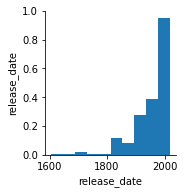

In [18]:
sns.pairplot(df)

## References

To come